## 군집화 실습
- 고객 세그먼테이션 (Custoemr Segmentation)

고객 세그먼테이션


고객 분류 요소


고객 세그먼테이션의 주요 목표 : 타깃 마케팅
    


고객 세그먼테이션 군집화
- 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요
- 예제 : 기본적인 고객 분석 요소인 FRM 기법 이용 

FRM 기법
- Recency(R)  
- Frequency(F)  
- Monetary Value(M) 

### 고객 세그먼테이션 예제 
- 온라인 판매 데이터를 기반으로  
    - 고객 세그먼테이션을 군집화 기반으로 수행  

사용 데이터 
- UCI : Machine Learning Repository에서 다운로드
- http://archive.ics.uci.edu/ml/datasets/online+retail
- Datasets 
- Online Retail.xslx
- 제품 주문 데이터 세트  

### 고객 세그먼테이션 군집화 과정

- 데이터 세트 로딩과 데이터 클린징

- RFM 기반 데이터 가공

- RFM 기반 고객 세그먼테이션


### 데이터 세트 로딩과 전처리 작업

In [2]:
# !pip install openpyxl
# 아마콘다 가상환경에서 설치

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
retail_df_origin = pd.read_excel('./data/Online Retail.xlsx')
retail_df_origin.head()
retail_df_origin.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
retail_df = retail_df_origin.copy()

In [ ]:
# 데이터 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# 기초 통계 정보 확인

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# 주문수량이 음수 있는지 확인 : 음수인 데이터 출력


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# 가격이 음수 있는지 확인 : 음수인 데이터 출력


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### 전처리 작업 필요

- CustomerID   

- Quantity와 UnitPrice에 음수값 존재 (반품)  


#### 음수값, CustomerID가 Null인 데이터, 영국 이외의 국가 데이터는 제외

In [ ]:
# Quantity와 UnitPrice에 음수값 포함된 데이터와  CustomerID가 Null삭제



# 크기 확인
retail_df.shape

# null 있는지 확인
retail_df.isnull().sum()


(397884, 8)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# 주문 고객 나라별 주문수 확인
# 각 나라별 몇 건씩 있는 지 확인
retail_df['Country'].value_counts()[:5]

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

In [ ]:
# 영국 외의 다른 국가 삭제


(354321, 8)

Country
United Kingdom    354321
Name: count, dtype: int64

### RFM 기반 데이터 가공

- 고객 세그먼테이션 군집화를 RFM 기반으로 수행하는 데 필요한 데이터 가공  
- Recency, Frequency, Monetary  

In [ ]:
# 구매 금액 계산해서 df에 추가
retail_df['SaleAmount'] =  
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 고객번호 (CustomerID) 수치인데 float : Null 값이 포함되어 있기 때문
# 고객번호가 Null 인 데이터 삭제했으로
# 고객번호 (CustomerID)를 편리하게 식별하기 위해 float형을 int 형으로 변환
retail_df['CustomerID'] = 
retail_df['CustomerID'].head(2)

0    17850
1    17850
Name: CustomerID, dtype: int32

In [ ]:
# 주문한 적이 있는 고객 수 확인
# 주문한 적이 있는 고객 : 주문 df에 존재하는 고객


3920

In [ ]:
# 고객별 주문 건수 확인 : 상위 5위 확인


CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64

In [ ]:
# 고객별 주문 건수 확인 : 하위 5위 확인


CustomerID
17752    1
16742    1
13120    1
16144    1
17956    1
Name: count, dtype: int64

In [ ]:
# 고객별 주문액 상위 5위 확인 


CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: SaleAmount, dtype: float64

### 식별자 확인
- 식별자 확인 : InvoiceNo + StockCode
    - InvoiceNo StockCode
    - 536365    85123A
    - 536365    71053
    - 536365    84406B

1.028702077315023

### RFM 기반의 고객 세그먼테이션 수행 방향
- 지금 수행하려는 RFM 기반의 고객 세그먼테이션은
    - 고객 레벨로 주문기간, 주문횟수, 주문금액 데이터를 기반으로 해서  
    - 세그먼테이션 수행  

    - 따라서 주문번호+제품코드 기준의 데이터를 
        - 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경 필요 

    --> 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group By 수행    
        - 현재의 retail_df 데이터 프레임에 CustomerID로 Group By를 해서  
        - CustomerID 기준으로 데이터 프레임 새로 생성  
---
- 그런데 DataFrame의 groupby()만 사용해서   
- 여러 개의 칼럼에 서로 다른 aggregation(count(), max(), sum()) 연산을 한 번에 수행하기 어려움  
- DataFrame의 groupby()의 multiple 연산을 위해 agg() 사용
- InvoiceNo 1개가 주문 1건 : 주문횟수 count()  
- InvoiceDate 최근 주문날짜 : max()  
- SaleAmout 주문 금액 : sum()  

In [ ]:
# groupby() : 여러 개의 함수를 수행하기 위해 agg() 사용
# Recency(R) : 가장 최근 상품 구입일에서 오늘까지의 기간
#    - InvoiceDate 컬럼의 max()에서 데이터 가공
# Frequency(F) : 상품 구매 회수 (InvoiceNo 컬럼의 count())
# Monetary vlaue(M) : 총 구매 금액 (SaleAmount 컬럼의 sum())

aggregations = {

}

cust_df = 
cust_df.head()

,InvoiceDate,InvoiceNo,SaleAmount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [22]:
# groupby 된 결과 컬럼명 변경 : Recency, Frequency, Monetary
cust_df = cust_df.rename(columns = {'InvoiceDate' :'Recency',
                                    'InvoiceNo' : 'Frequency',
                                    'SaleAmount' : 'Monetary'})

In [23]:
cust_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [ ]:
# CustomerID index를 열로 변경
cust_df = 
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


### Recency를 날짜에서 정수형으로 가공
- 온라인 판매기간을 기준으로 가장 최근 주문일로부터 얼마나 지났는지를 계산하여 필드 생성  
- Recency = 오늘 날짜 - 가장 최근 주문일  
- 온라인 판매 데이터 판매 기간 확인  
- 2010-12-01 ~ 2011-12-09  
- 따라서 오늘은 하루 더해서 2011-12-10로 설정  

In [28]:
# 온라인 판매 데이터 판매 기간 확인
retail_df['InvoiceDate'].min()
retail_df['InvoiceDate'].max()
# 기간 : 2010-12-01 ~ 2011-12-09
# 데이터 기준 오늘 : 2011-12-10

Timestamp('2010-12-01 08:26:00')

Timestamp('2011-12-09 12:49:00')

In [29]:
cust_df['Recency'].min()
cust_df['Recency'].max()

Timestamp('2010-12-01 09:53:00')

Timestamp('2011-12-09 12:49:00')

In [30]:
# 빼기 연산 : 오늘 날짜 - 가장 최근 주문일 
import datetime as dt
dt.datetime(2011, 12, 10) - cust_df['Recency']
# 빼기 연산 수행 결과 0 값 존재 --> + 1 수행 (더하기 1)

0      325 days 13:59:00
1        2 days 09:26:00
2        0 days 11:40:00
3        3 days 14:04:00
4        3 days 08:48:00
              ...       
3915   277 days 14:08:00
3916   180 days 13:07:00
3917     7 days 12:17:00
3918     3 days 11:58:00
3919    42 days 14:31:00
Name: Recency, Length: 3920, dtype: timedelta64[ns]

In [31]:
# 참고 : 날짜 연산 후 정수만 추출
result = dt.datetime(2011, 12, 10) - dt.datetime(2011, 12, 8) 
result
result.days  # 2

datetime.timedelta(days=2)

2

In [32]:
# Recency를 날짜에서 정수형으로 변환
# 오늘 : 2011-12-10

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency'] # 0 값 존재

# 각 값에 더하기 1 수행 
cust_df['Recency'] = cust_df['Recency'].apply(lambda x : x.days+1) # 날짜 정수에 1 더하기 
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


### RFM 기반 고객 세그먼테이션
- 고객 RFM 데이터 세트의 특성 확인하고  
- FRM 기반에서 고객 세그먼테이션 수행  

#### Recency, Frequency, Monetary 값의 분포도 확인

Text(0.5, 1.0, 'Recency Histogram')

(array([1701.,  728.,  331.,  215.,  208.,  179.,  170.,  153.,  120.,
         115.]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Frequency Histogram')

(array([3.894e+03, 1.800e+01, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 7.8560e+02, 1.5702e+03, 2.3548e+03, 3.1394e+03,
        3.9240e+03, 4.7086e+03, 5.4932e+03, 6.2778e+03, 7.0624e+03,
        7.8470e+03]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Monetary Histogram')

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

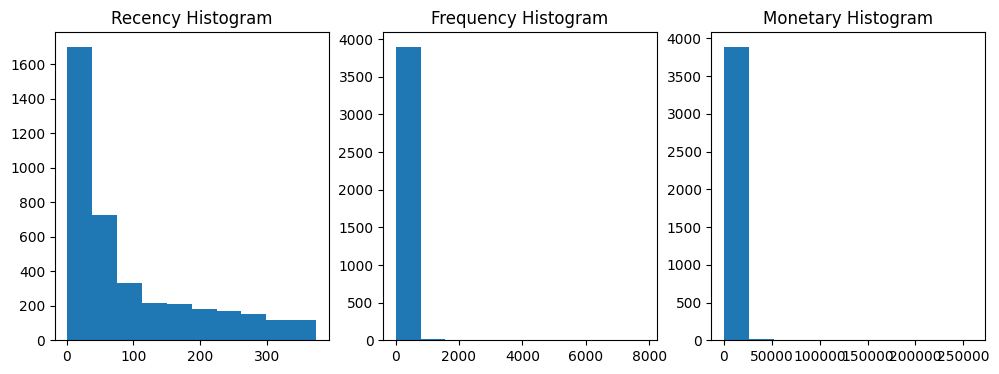

In [33]:
# 히스토그램으로 분포도 확인
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (12, 4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()


In [ ]:
# 기초 통계 정보 확인
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

# Recency
# - 평균이 92.742092로 50%(중위값 2/4)인 51 보다 크게 높음
# - max 값은 374로 75%(3/4)인 143보다  커서
# - 왜곡 정도가 어느 정도 있음을 알 수 있음

# Frequency
# - 왜곡 정도가 더 심함
# - 평균이 90.38인데 75% 99.25
# - 이유 : max 값 7847을 포함한 상위 몇 개의 큰 값 때문이라 판단됨

# Monetary
# - 마찬가지로 왜곡 정도가 매우 심함
# - 평균 1864로 75%인 1576 보다 훨씬 큼
# - 이유 : max 값 259,657를 포함한 상위 몇 개의 큰 값으로 인해 발생한 현상으로 보임 

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


### 온라인 판매 데이터 세트 특징
- 개인 고객 주문 + 소매점 주문


### 왜곡 정도가 매우 높은 데이터 세트에
- K-평균 군집을 적용하면  
    - 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨  

    - 그래서 먼저 평균과 표준편차 재조정한 뒤에 K-평균 수행  
        - (StandardScaler 사용해서 표준화해서 변환)   

### K-Means로 군집화 후에 실루엣 계수 평가
- (1) 왜곡정도가 심한 데이터를 그대로 사용할 경우  
- (2) 표준화 변환 수행후 군집화¶  

#### (1) 왜곡정도가 심한 데이터를 그대로 사용해서 실루엣 계수 확인

In [ ]:
# 군집화 수행 : 군집 개수 4개로 구성

from sklearn.cluster import KMeans



In [36]:
labels

array([2, 0, 2, ..., 0, 0, 0])

In [37]:
# 실루엣 스코어 출력 : labels 값을 cust_df에 컬럼으로 추가 

from sklearn.metrics import silhouette_score


cust_df['cluster_label1'] = labels
print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features, labels)))


# 실루엣 스코어 : 0.839
# 왜곡 정도가 매우 심한 데이터 세트인데 
# 높은 실루엣 계수가 산출됨 : 이상치에 반응해서 과적합이 발생한 것으로 간주
# 왜곡도 심한 데이터 세트로 K-평균 군집을 적용하면
# 변별력이 떨어지는 군집화가 수행될 수 있음

# -> 실루엣 계수 절대적 수치 보다는
# -> 개별 군집의 균일도도 같이 확인해야 함

# 먼저 평균과 표준편차를 재조정한 후 
# K-평균 군집화 재 수행 



실루엣 스코어 : 0.839


#### (2) 표준화 변환 수행후 군집화

In [38]:
# StandardScaler 사용해서 표준 변환 수행

from sklearn.preprocessing import StandardScaler

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled[:3]

array([[ 2.3438109 , -0.41044983, 10.06690642],
       [-0.90174217,  0.05791145,  0.31163688],
       [-0.92183848, 20.68417459,  4.25767546]])

In [39]:
# 군집화 재 수행 : 군집 5개로 구성
X_features = cust_df[['Recency','Frequency','Monetary']].values
kmeans = KMeans(n_clusters=5, n_init=10, init='k-means++', max_iter=300, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))


실루엣 스코어 : 0.616


In [40]:
# 군집화 재 수행 : 군집 4개로 구성
X_features = cust_df[['Recency','Frequency','Monetary']].values
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', max_iter=300, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.595


In [41]:
# 군집화 재 수행 : 군집 3개로 구성
X_features = cust_df[['Recency','Frequency','Monetary']].values
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.592


In [42]:
# 군집 개수에 따른 실루엣 스코어
# 3 : 0.592
# 4 : 0.595
# 5 : 0.616

# 표준화한 후 실루엣 스코어는 더 떨어졌고
# 군집의 개수에 따라서 크게 편차가 없음을 확인
# --> 실루엣 계수만으로는 군집화가 더 잘되었다고 판단할 수 없음
# --> 시각화해서 실루엣 계수뿐 아니라 
# --> 균일도를 같이 확인할 필요가 있음

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### K-Means 군집화 후에 실루엣 계수 및 군집을 시각화
- (1) 왜곡된 데이터인데 로그 변환 수행하지 않고 군집화 후 실루엣 계수 평가   
- (2) 로그 변환 수행하고 군집화 후 실루엣 계수 평가    

visualize_silhouette() 함수와 visualize_kmeans_plot_multi() 함수 사용

visualize_silhouette()
- 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때
- 개별 군집별 평균 실루엣 계수 값을 시각화하는 함수 (앞에서 사용했음)

visualize_kmeans_plot_multi() 
- 군집 개수별로 군집화 구성을 시각화하는 함수

#### (1) 왜곡된 데이터인데 로그 변환 수행하지 않고 군집화 후 실루엣 계수 평가  

In [44]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):        
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters=n_cluster, n_init=10, init='k-means++', max_iter=500, 
                           random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    plt.show()

In [45]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'd', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

### 실루엣 계수 / 군집화 그래프 출력
- (1) 표준화만 수행한 데이터 사용해서 군집화  
- (2) 로그 변환 수행 후 군집화 

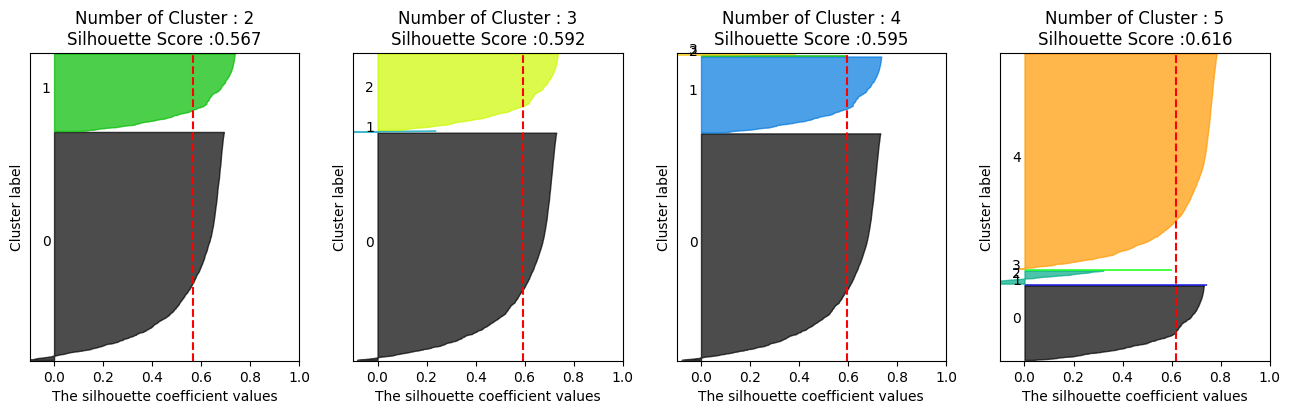

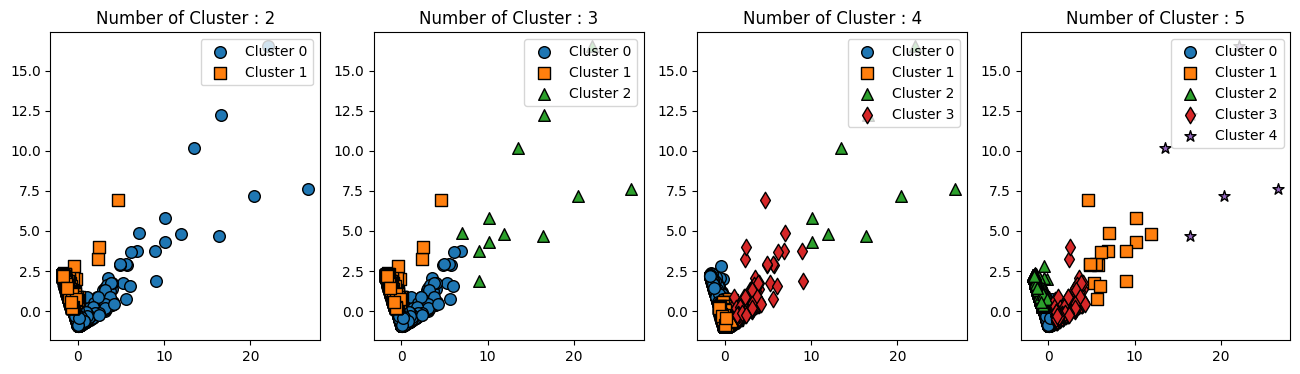

In [46]:
# (1) 표준화만 수행한 데이터 사용해서 군집화 : 로그변환 수행하지 않고 시각화
# 실루엣 계수 / 군집화 그래프 출력 함수 호출
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

### 왜곡된 데이터에 로그 변환 수행
 

### (2) 로그 변환 수행하고 군집화 후 실루엣 계수 평가
- 로그 변환 / StandardScale 수행 

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# 로그 변환 수행


In [49]:
cust_df.head(2)

,CustomerID,Recency,Frequency,Monetary,cluster_label1,cluster_label,Recency_log,Frequency_log,Monetary_log
0,12346,326,1,77183.60,2,1,5.789960,0.693147,11.253955
1,12747,3,103,4196.01,0,0,1.386294,4.644391,8.342128


In [ ]:
# 로그 변환된 데이터 StandardScaler 적용


X_features_scaled[:3]

array([[ 1.48161832, -2.40338709,  3.78591383],
       [-1.88997639,  0.73257781,  1.44428   ],
       [-2.42067319,  3.73941895,  3.1199826 ]])

In [ ]:
# 군집화 수행



print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

# 결과
# 실루엣 계수가 로그 변환하기 전보더 더 떨어짐
# 그러나 실루엣 계수의 절대치가 절대적으로 중요한 것은 아니고
# 개별 군집이 얼마나 더 균일하게 군집화되었는지가 더 중요
# -> 균일도와 그래프 확인 

실루엣 스코어 : 0.303


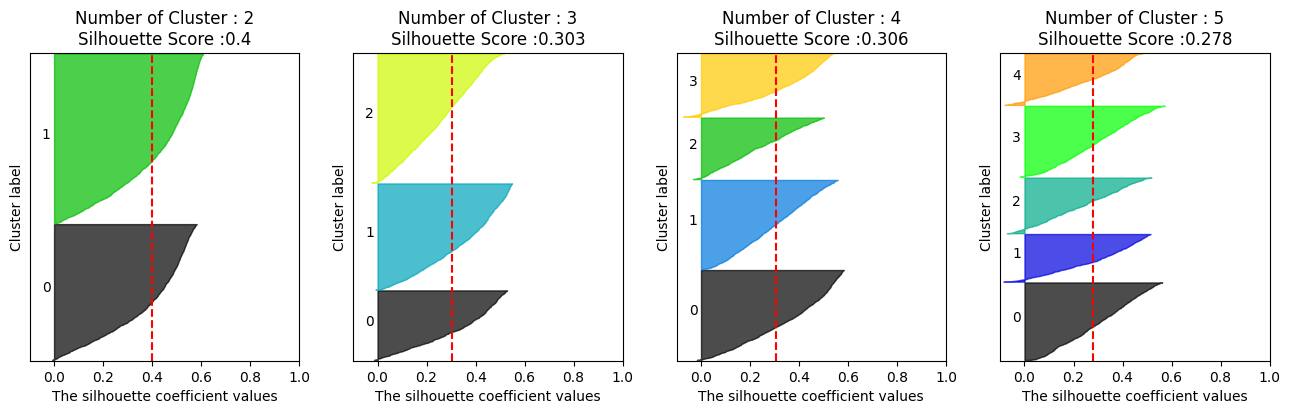

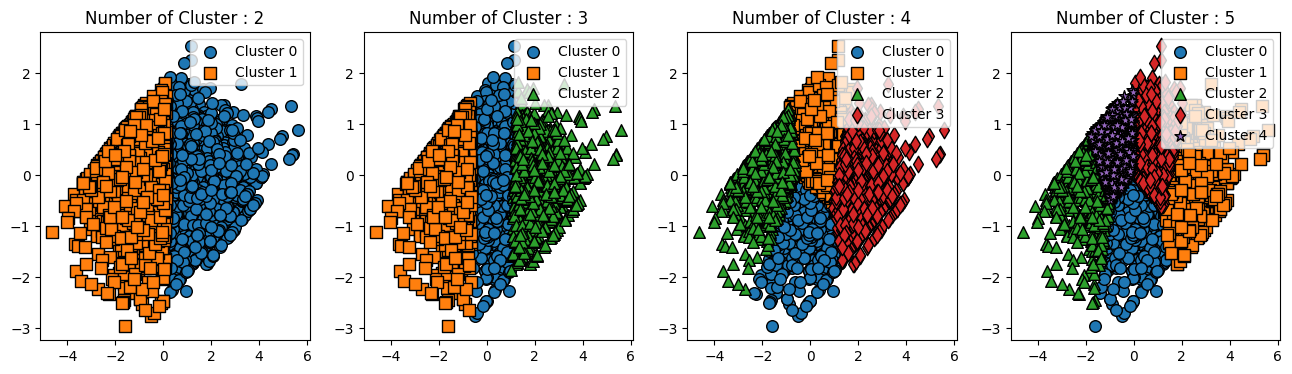

In [52]:
# 로그 변환된 데이터 세트로 실루엣 계수와 군집화 구성 시각화

# 실루엣 계수 / 군집화 그래프 출력 함수 호출
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

# 결과
# 실루엣 계수는 로그 변환 전 보다 더 떨어졌지만
# 균일하게 군집화가 구성된 것을 확인할 수 있음
# 실루엣 계수 절대치보다 개별 군짐의 균일도도 같이 확인해야 함

# 결론
# 왜곡된 데이터 세트에 대해서는
# 로그 변환 수행해서 데이터를 변환한 후에
# 군집화를 수행하면 더 나은 결과를 도출할 수 있음 

In [53]:
cust_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label1,cluster_label,Recency_log,Frequency_log,Monetary_log
0,12346,326,1,77183.60,2,2,5.789960,0.693147,11.253955
1,12747,3,103,4196.01,0,0,1.386294,4.644391,8.342128
2,12748,1,4595,33719.73,2,0,0.693147,8.432942,10.425868
3,12749,4,199,4090.88,0,0,1.609438,5.298317,8.316760
4,12820,4,59,942.34,0,0,1.609438,4.094345,6.849427


In [54]:
cust_df['cluster_label'].value_counts()

cluster_label
2    1660
1    1365
0     895
Name: count, dtype: int64

### 군집결과 확인

데이터 분석 도메인
- 특정 분야의 전문화된 지식. 데이터가 발생한 환경에 관한 지식  
- 데이터 사이언스를 통해서 해결하고자 하는 문제가 속한 업계, 산업에 대한 전문성을 의미
  - 예 : 병원 데이터 : 병원 관련 도메인 지식 
- 도메인 지식이 있는 사람들을 해당 분야의 전문가로 간주

- 우리의 경우 전문가라고 할 수는 없지만
- 데이터 분석할 때 주어진 데이터의 도메인을 해석하려고 노력은 해야 함


- 예로 상품 판매 데이터를 분석하려고 하면
  - 당연히 상품에 관련 데이터를 확인하고
  - 고객 데이터도 분석하고
  - 관련 매출 관련 행태도 분석해야 함
- 이런 것들을 좀 더 관찰하고 분석할 때
- 도메인 지식을 얻을 수 있음 

- 도메인 지식 예
  - 고객 
    - 성별, 나이, 거주지, 직업
    - 소득, 신용도, 계정 등 
    
  - 상품 
    - 가격, 특성
    
  - 주문
    - 주문 건수, 주문 금액, 평균 구매액, 구매 주기, 최근 구매 여부 등 
    
- 이러한 정보들을 확인하고
- 이러한 정보들이 주어져 있지 않다면 
- 가공해서 추출 